# ВЫПУСКНАЯ КВАЛИФИКАЦИОННАЯ РАБОТА по курсу «Data Science» 
# Слушатель Саморукова Юлия Дмитриевна

В ходе выполнения ВКР требуется сделать:

1) Изучить теоретические основы и методы решения поставленной задачи.

2) Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонки получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.

3) Провести предобработку данных (удаление шумов, нормализация и т.д.).

4) Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.

5) Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.

6)Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).

7)Оценить точность модели на тренировочном и тестовом датасете.

8) Создать репозиторий в GitHub / GitLab и разместить там код исследования. Оформить файл README.

# 1. Изучить теоретические основы и методы решения поставленной задачи 

# Предоставленная информация:
Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними.
Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. 
При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. Яркий пример композита - железобетон. 
Бетон прекрасно сопротивляется сжатию, но плохо растяжению. 
Стальная арматура внутри бетона компенсирует его неспособность сопротивляться сжатию, формируя тем самым новые, уникальные свойства. 
Современные композиты изготавливаются из других материалов: полимеры, керамика, стеклянные и углеродные волокна, но данный принцип сохраняется. 
У такого подхода есть и недостаток: даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. 
Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. 
Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента).

# 2. Провести разведочный анализ предложенных данных

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from pandas import DataFrame
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV

### Производим загрузку данных с локального диска.

In [2]:
df_bp=pd.read_excel('X_bp.xlsx', index_col=0)
df_bp

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [3]:
df_nup=pd.read_excel('X_nup.xlsx', index_col=0)
df_nup

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.000000,57.000000
1.0,0.0,4.000000,60.000000
2.0,0.0,4.000000,70.000000
3.0,0.0,5.000000,47.000000
4.0,0.0,5.000000,57.000000
...,...,...,...
1035.0,90.0,8.088111,47.759177
1036.0,90.0,7.619138,66.931932
1037.0,90.0,9.800926,72.858286
1038.0,90.0,10.079859,65.519479


### Объединяю таблицы с помощью  Inner

In [4]:
df = df_bp.merge(df_nup, left_index=True,right_index=True, how='inner')

In [5]:
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


#### Часть строк из таблицы X_nup была исключена, в датасете осталось 1023 строки с 13 признаками

### Средние и медианные значения

In [6]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


### Проверка пропусков и дубликатов

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

#### Тип данных с плав.запятой, строковых значений не имеет. Пропущенные значения отсуствуют.

## Гистограммы распределения каждой из переменной

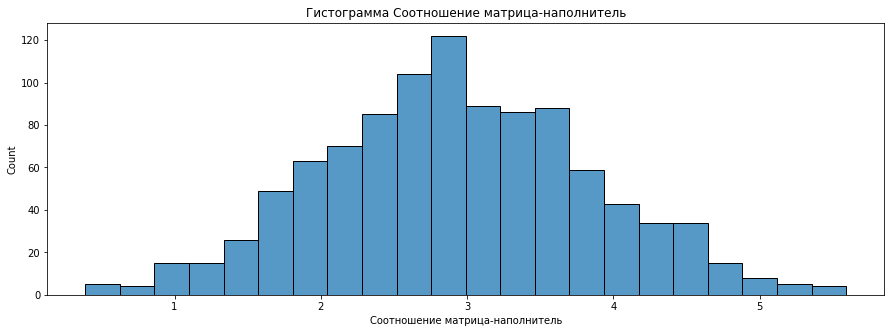

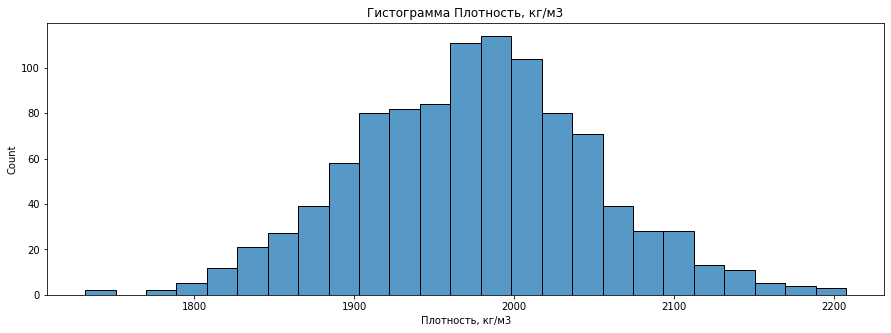

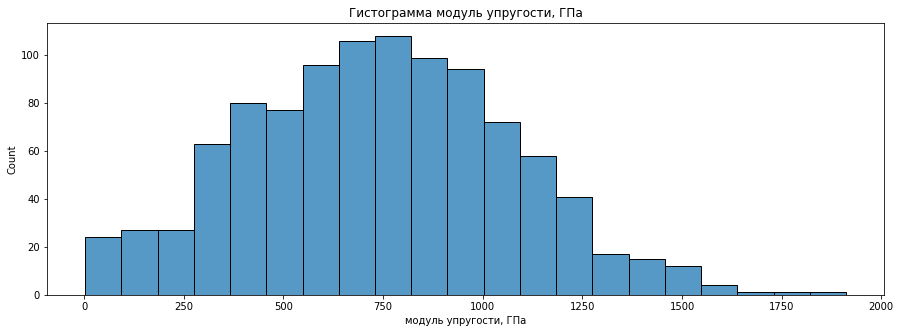

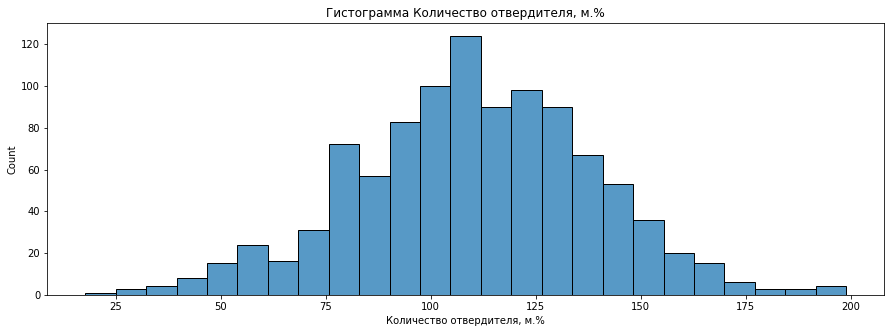

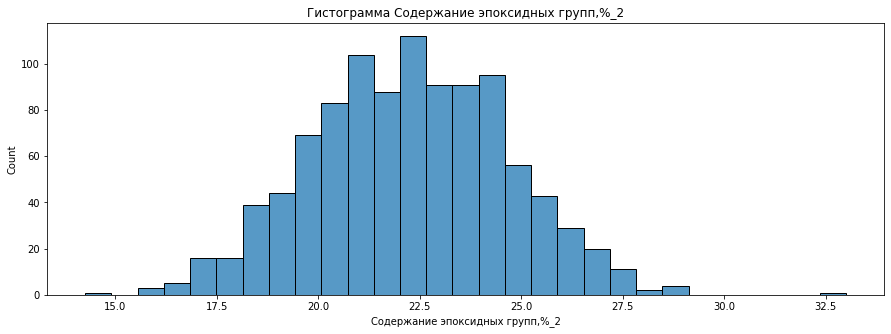

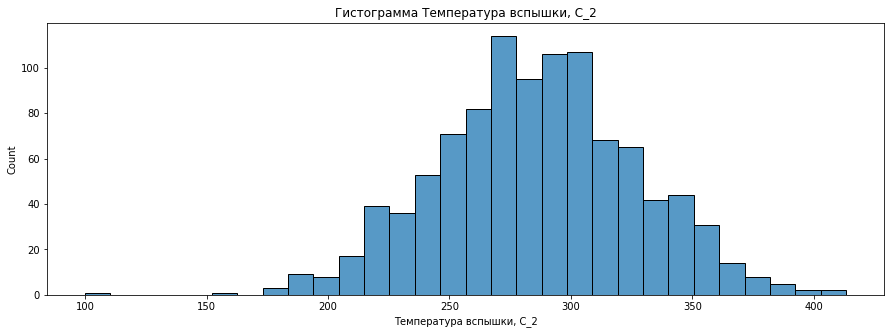

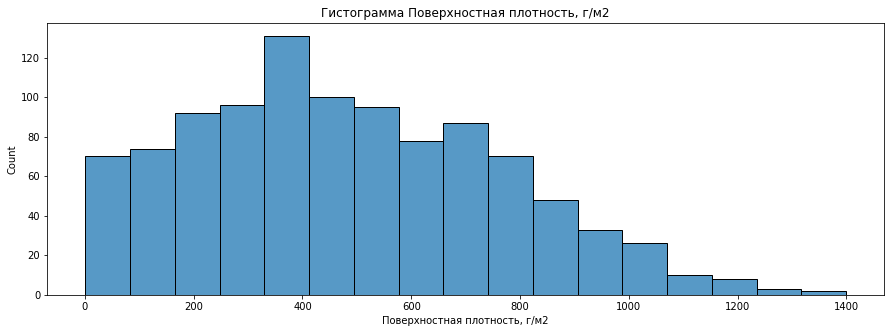

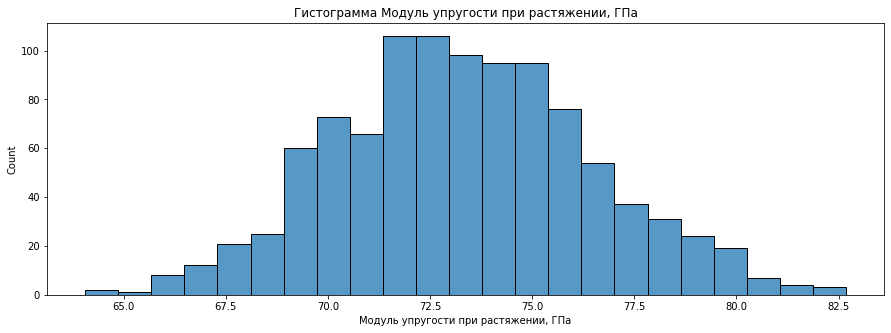

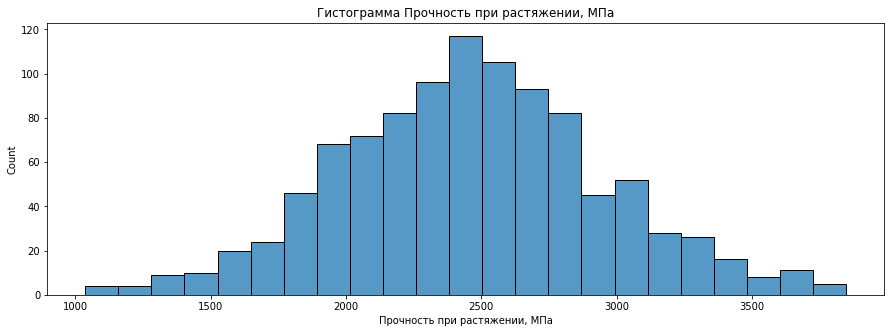

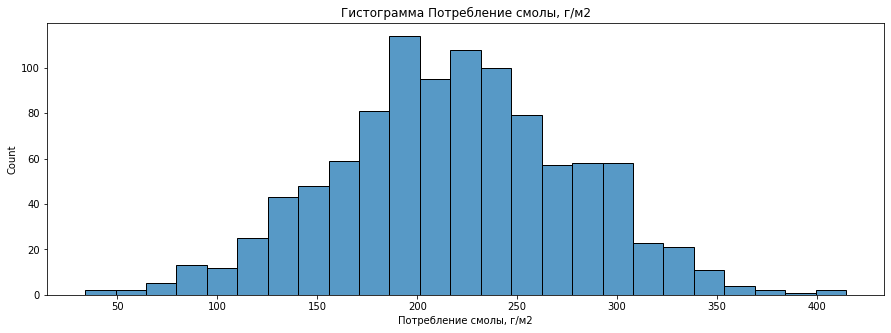

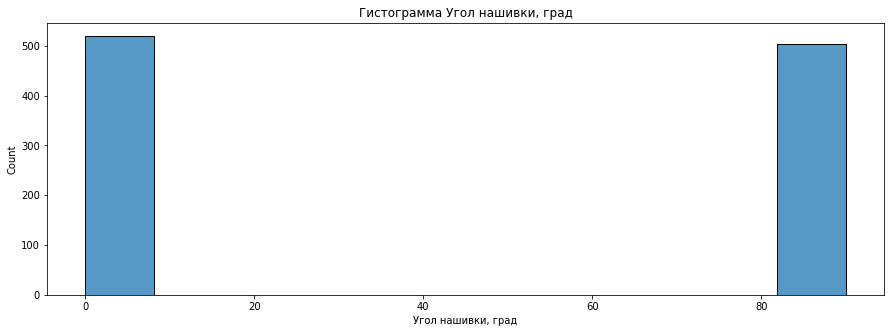

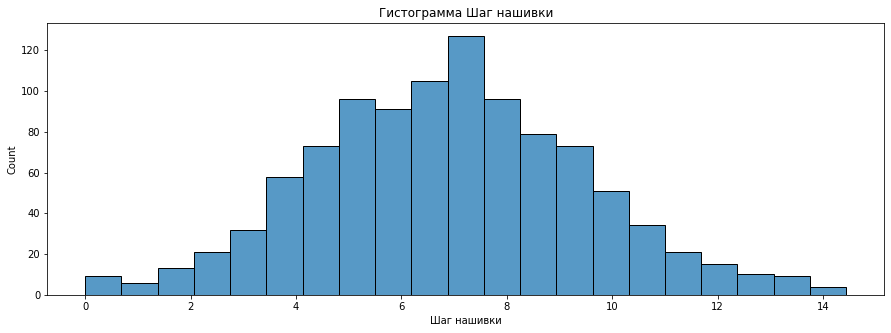

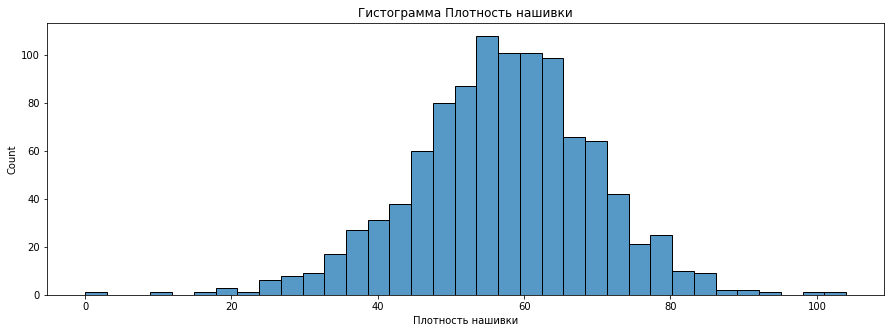

In [9]:
for col in df.columns: 
  plt.figure(figsize=(15, 5))
  plt.title("Гистограмма "+str(col))
  sns.histplot(data=df[col])
  plt.show()

## Диаграммы размаха (ящик с усами)

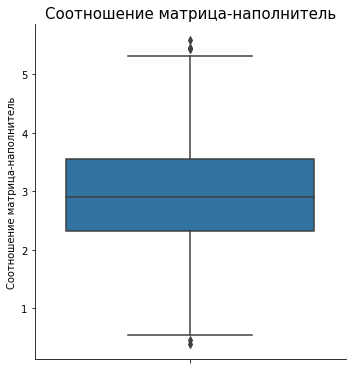

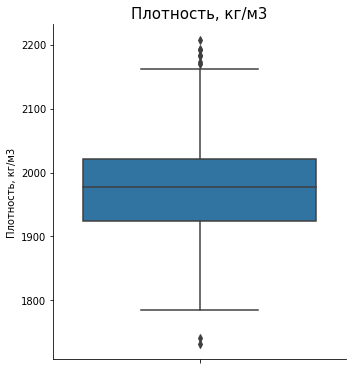

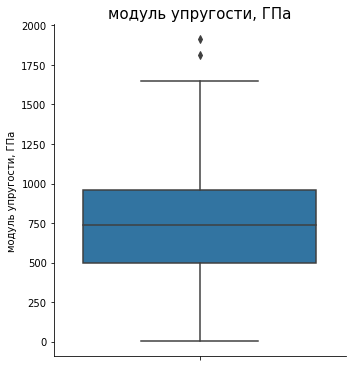

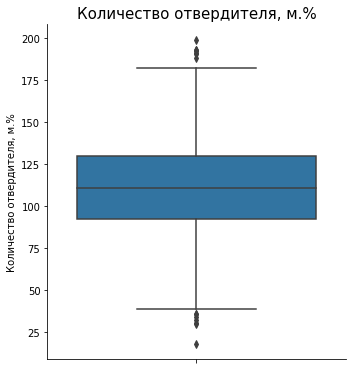

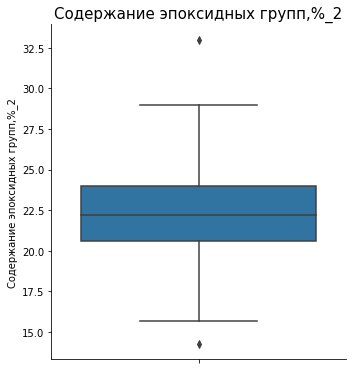

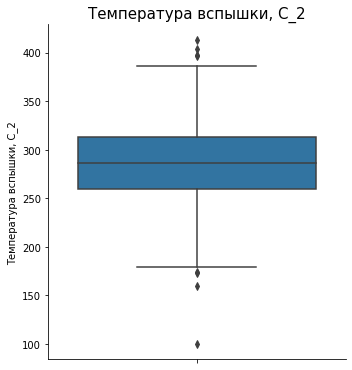

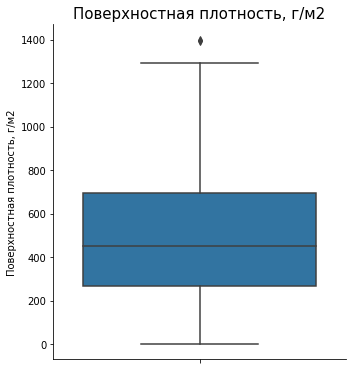

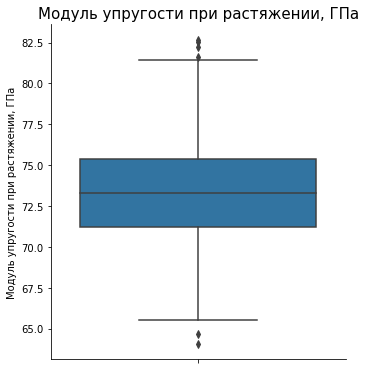

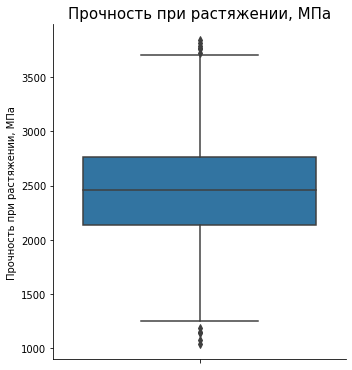

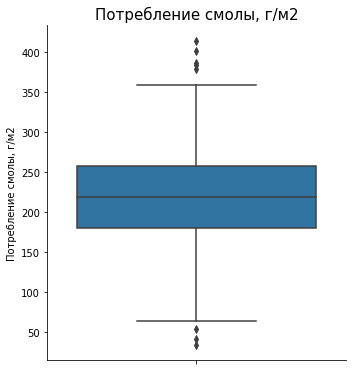

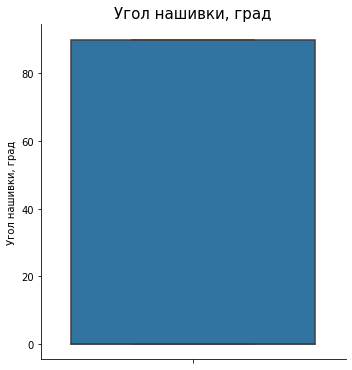

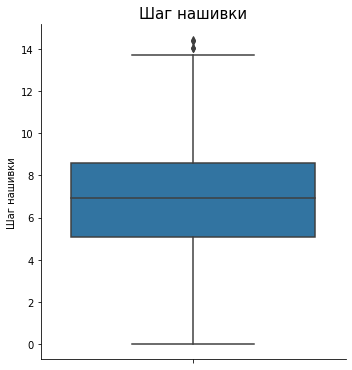

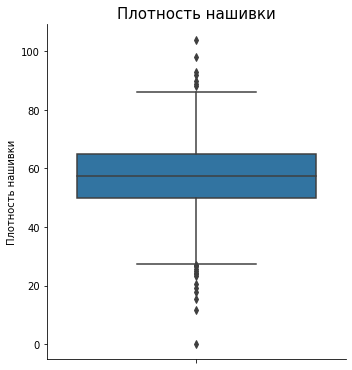

In [10]:
for col in df.columns: 
    sns.catplot(y=col, data=df, kind='box')
    plt.title(col, fontsize=15)

## Попарные графики рассеяния точек

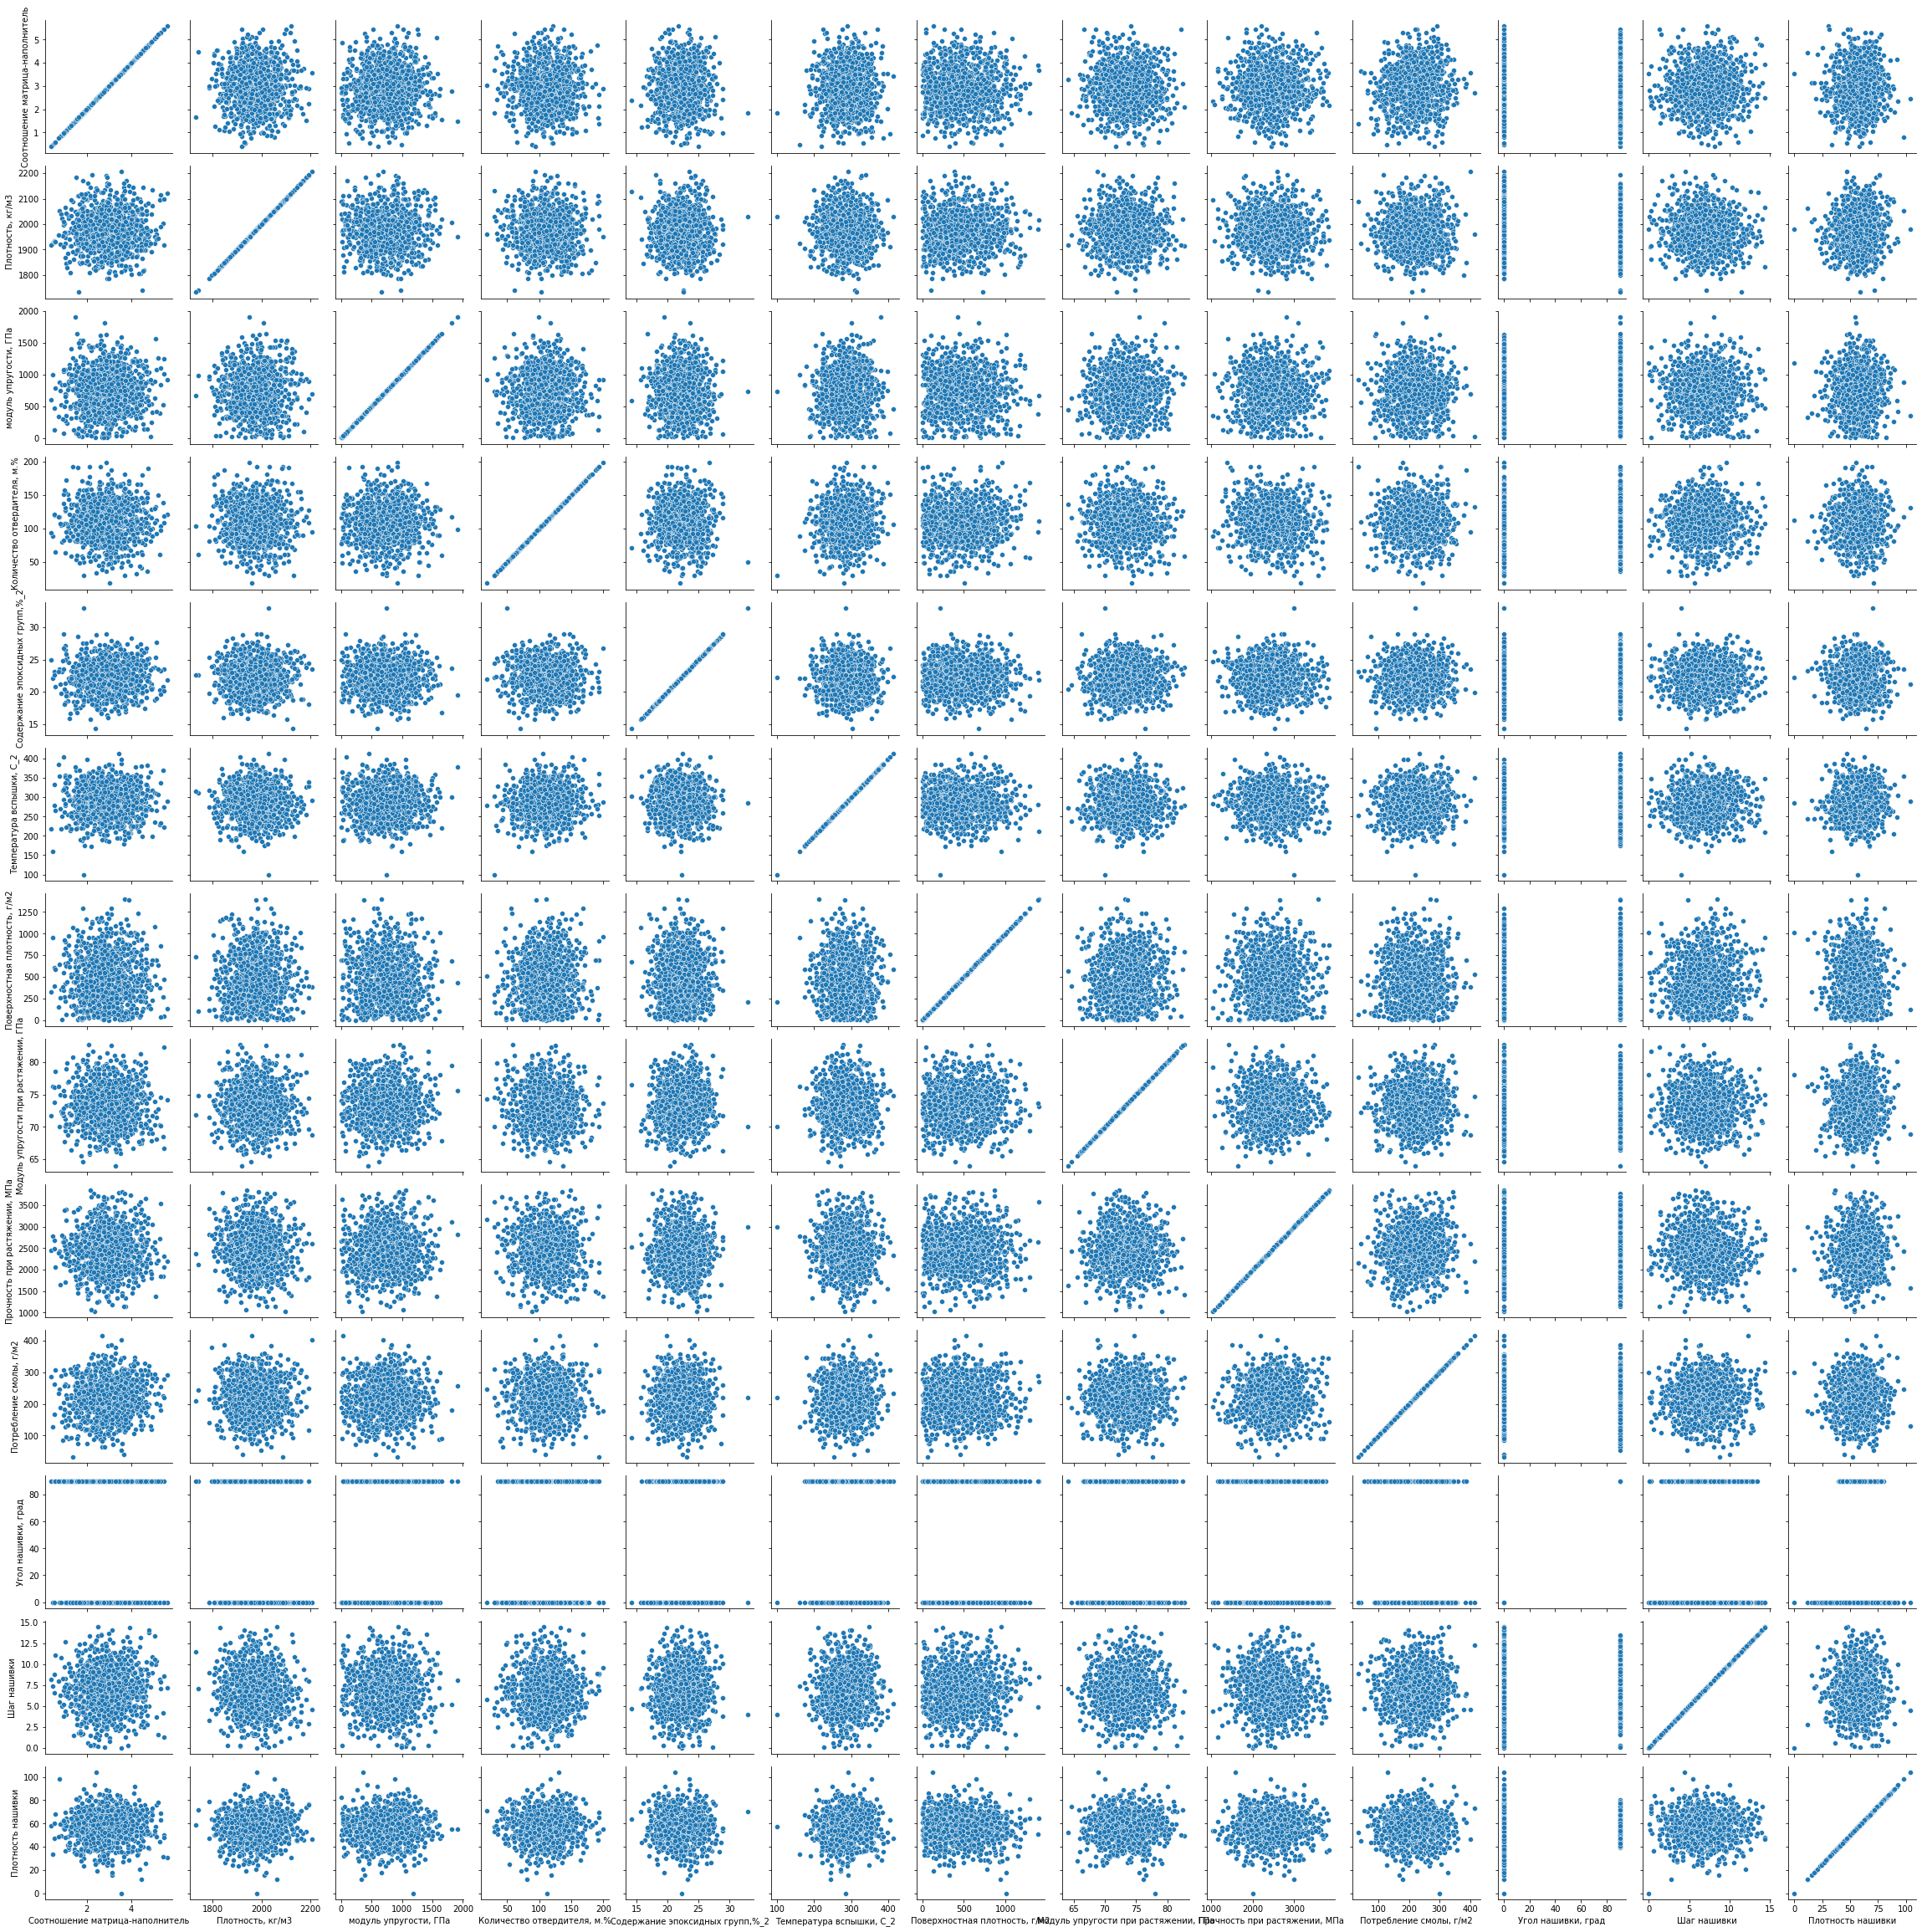

In [11]:
cols = df.columns
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

### На графике рассеяния видны небольшие выбросы.

## Матрица корреляции данных

<AxesSubplot:>

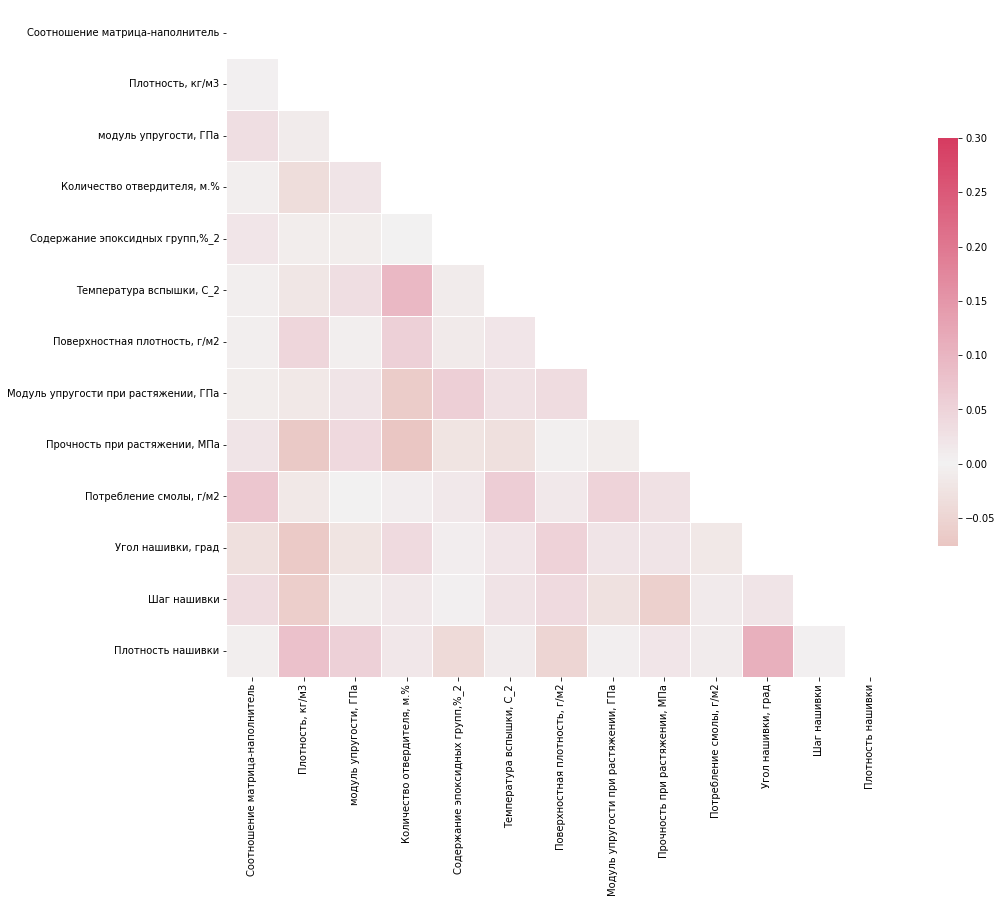

In [12]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize=(15, 15))

# Создаем цветовую палитру
cmap = sns.diverging_palette(15, 3, as_cmap=True)

# Визуализируем данные кореляции 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# 3) Провести предобработку данных (удаление шумов, нормализация и т.д.)

In [13]:
#Составим список признаков, у которых более 95% строк содержат одно и то же значение.
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

### Признаки с повторениями отсутствуют. Убираем выбивающиеся из распределения значения.

In [14]:
# очистим данные от выбросов
for x in df.columns:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [15]:
# проверим какое количество выбросов по каждому столбцу
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [16]:
# количество выбросов довольно мало, можно просто удалить эти строки
df = df.dropna(axis = 0)

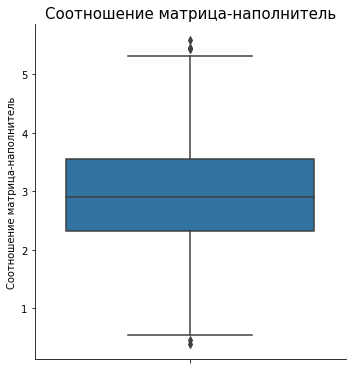

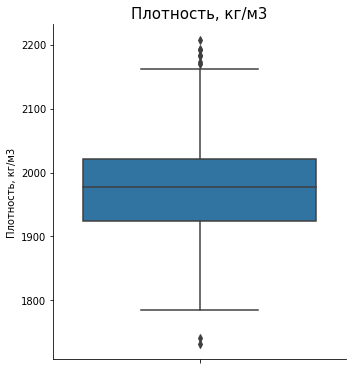

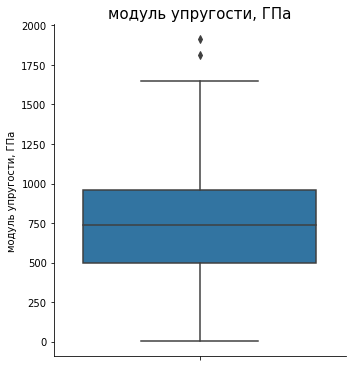

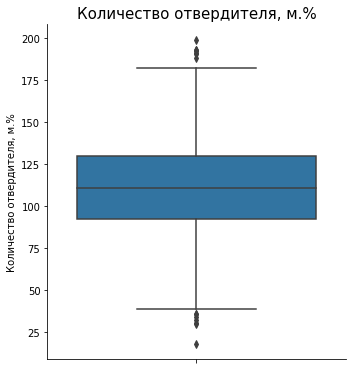

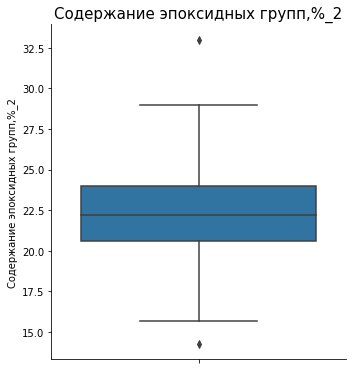

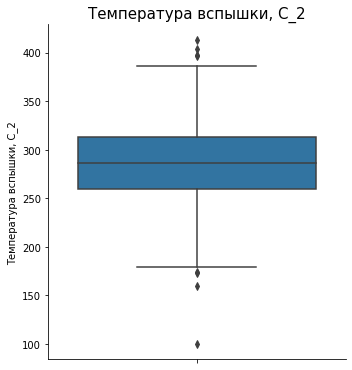

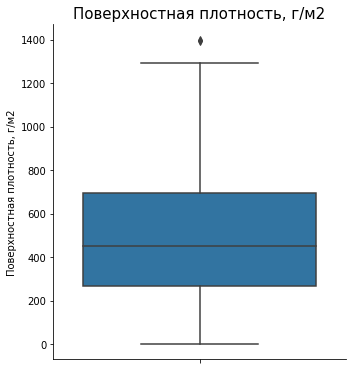

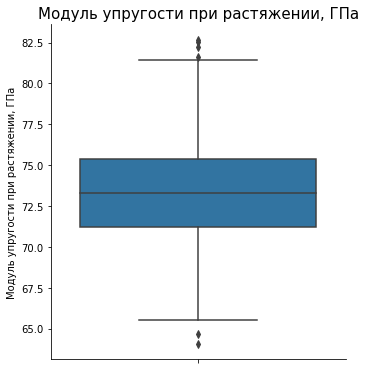

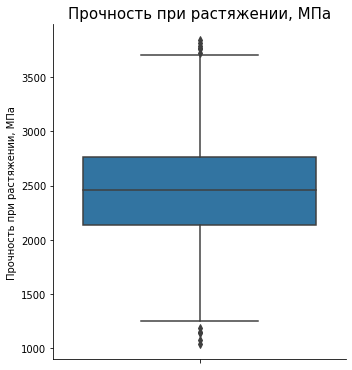

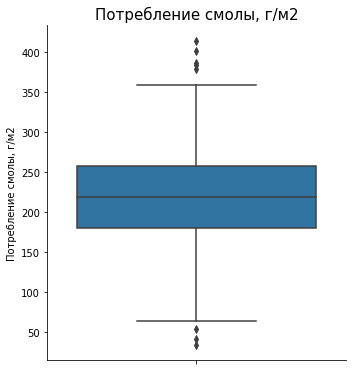

In [17]:
# повторно анализируем диаграммы размаха
for col in df_bp.columns: 
    sns.catplot(y=col, data=df_bp, kind='box')
    plt.title(col, fontsize=15)

### Нормализация

In [18]:
scaler = MinMaxScaler()
norm_df=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 
norm_df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
std,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781,0.500129,0.183258,0.191342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067,0.000000,0.372211,0.390482
50%,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766,1.000000,0.504258,0.516029
75%,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447,1.000000,0.624604,0.638842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4) Обучение моделей для прогноза модуля упругости при растяжении и прочности при растяжении

In [19]:
norm_df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
std,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781,0.500129,0.183258,0.191342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067,0.000000,0.372211,0.390482
50%,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766,1.000000,0.504258,0.516029
75%,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447,1.000000,0.624604,0.638842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
5.0,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,60.000000
6.0,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [21]:
target = norm_df['Прочность при растяжении, МПа']
train = norm_df[[ 'модуль упругости, ГПа']]

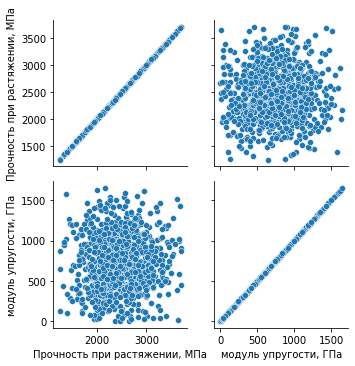

In [22]:
cols=['Прочность при растяжении, МПа','модуль упругости, ГПа']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

In [23]:
X = df.copy()
X

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
5.0,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,60.000000
6.0,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [24]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(train, target, test_size=0.3, random_state=1)
Xtrain

,"модуль упругости, ГПа"
775.0,0.301010
370.0,0.483233
50.0,0.243451
311.0,0.326373
868.0,0.512460
...,...
846.0,0.677026
78.0,0.386467
994.0,0.462350
263.0,0.493137


### Модель линейной регрессии для параметра прочность при растяжении

In [25]:
from sklearn.linear_model import LinearRegression, LogisticRegression
lr = LinearRegression()
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(Xtrain, Ytrain)
pred1 = lin_reg_mod.predict(Xtrain)
pred2 = lin_reg_mod.predict(Xtest)

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(Ytrain, pred1),
        mean_squared_error(Ytest, pred2)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(Ytrain, pred1),
        r2_score(Ytest, pred2)))

MSE train: 0.036, test: 0.035
R^2 train: 0.001, test: -0.008


In [26]:
all_accuracies = cross_val_score(estimator=lr, X=Xtrain, y=Ytrain, cv=10)
print(all_accuracies.mean())

-0.019900774405664623


#### Тестовое значение R^2 принимает отрицательное число. 
#### Вывод: отсутствие линейной взаимосвязи в модели

### Метод K-ближайших соседей для параметра прочность при растяжении

In [27]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(Xtrain, Ytrain)
y_pred_knn = knn.predict(Xtest)
print("Оценка R2 к-ближайших соседей:", r2_score(Ytest, y_pred_knn))

Оценка R2 к-ближайших соседей: -0.2809276120596824


In [28]:
all_accuracies = cross_val_score(estimator=knn, X=Xtrain, y=Ytrain, cv=10)
print(all_accuracies.mean())

-0.2397751063721448


### Random forest для параметра прочность при растяжении

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
model = RandomForestRegressor(n_estimators=1500, max_depth=10)
model.fit(Xtrain, Ytrain)
y_pred_forest = model.predict(Xtest)
max_features: ['auto','sqrt','log2']
print('R^2 test: {:.3f}'. format(r2_score(Ytest, y_pred_forest)))

R^2 test: -0.166


In [30]:
all_accuracies = cross_val_score(estimator=rfr, X=Xtrain, y=Ytrain, cv=10)
print(all_accuracies.mean())

-0.5394410777074888


#### Результат на глубину в 10 слоев и 1500 итераций - значение коэффициента детерминации все также отрицательное.

#  Для параметра упругость

In [31]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(train, target, test_size=0.3, random_state=1)
Xtrain

,"модуль упругости, ГПа"
775.0,0.301010
370.0,0.483233
50.0,0.243451
311.0,0.326373
868.0,0.512460
...,...
846.0,0.677026
78.0,0.386467
994.0,0.462350
263.0,0.493137


In [32]:
print("Размер тренировочного датасета на входе:", Xtrain.shape)
print("Размер тестового датасета на входе:", Xtest.shape)
print("Размер тренировочного датасета на выходе:", Ytrain.shape)
print("Размертестового датасета на выходе:", Ytest.shape)

Размер тренировочного датасета на входе: (655, 1)
Размер тестового датасета на входе: (281, 1)
Размер тренировочного датасета на выходе: (655,)
Размертестового датасета на выходе: (281,)


### Модель линейной регрессии для параметра упругость при растяжении

In [33]:
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
y_pred = lr.predict(Xtest)
print("Оценка R2 линейная регрессия:", r2_score(Ytest, y_pred))

Оценка R2 линейная регрессия: -0.008008096662396769


In [34]:
all_accuracies = cross_val_score(estimator=lr, X=Xtrain, y=Ytrain, cv=10)
print(all_accuracies.mean())

-0.019900774405664623


### Метод K-ближайших соседей для упругости при растяжении

In [35]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(Xtrain, Ytrain)
y_pred_knn = knn.predict(Xtest)
print("Оценка R2 к-ближайших соседей:", r2_score(Ytest, y_pred_knn))

Оценка R2 к-ближайших соседей: -0.2809276120596824


In [36]:
all_accuracies = cross_val_score(estimator=knn, X=Xtrain, y=Ytrain, cv=10)
print(all_accuracies.mean())

-0.2397751063721448


### Random forest для параметра упругость при растяжении

In [37]:
model = RandomForestRegressor(n_estimators=2000, max_depth=5)
model.fit(Xtrain, Ytrain)
y_pred_forest = model.predict(Xtest)
print('R^2 test: {:.3f}'. format(r2_score(Ytest, y_pred_forest)))

R^2 test: -0.028


In [38]:
all_accuracies = cross_val_score(estimator=rfr, X=Xtrain, y=Ytrain, cv=10)
print(all_accuracies.mean())

-0.548077758704397


## Поиск Гиперпараметров

#### Импортируем функции для поиска по сетке параметров с перекрестной проверкой

In [39]:

from sklearn.model_selection import GridSearchCV

In [40]:
random_forest_tuning = RandomForestRegressor(random_state = 30)
param_grid = {
   'n_estimators': [100, 200, 500,700,900],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [2,3,],
   'criterion' :['squared_error']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5, verbose=2)
GSCV.fit(Xtrain, Ytrain)
GSCV.best_params_ 

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=200; total time=   0.1s
[CV] END cr

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 200}

In [41]:
rf = GSCV.best_estimator_

In [42]:
rf.fit(Xtrain, Ytrain)

RandomForestRegressor(max_depth=2, n_estimators=200, random_state=30)

In [43]:
rf.predict(Xtest)

array([0.49937237, 0.51721498, 0.51721498, 0.50379367, 0.51299246,
       0.52611057, 0.51430736, 0.49776982, 0.48724366, 0.49407495,
       0.49814568, 0.51351549, 0.49863203, 0.51181923, 0.51315862,
       0.49911694, 0.5019478 , 0.5090705 , 0.49911694, 0.51493776,
       0.51299246, 0.50855023, 0.51210569, 0.51721498, 0.49806138,
       0.51138032, 0.46948417, 0.51250217, 0.45023305, 0.45310457,
       0.49776982, 0.51105479, 0.51243288, 0.49785246, 0.51721498,
       0.50760882, 0.44862968, 0.50399254, 0.45310457, 0.51240961,
       0.51721498, 0.51581007, 0.51721498, 0.48825309, 0.49687873,
       0.49482606, 0.51315862, 0.50400678, 0.5190723 , 0.49830911,
       0.49994347, 0.51315862, 0.49994347, 0.51250217, 0.4692275 ,
       0.44939456, 0.49512647, 0.51243698, 0.51318389, 0.49893996,
       0.49785246, 0.51430736, 0.45235154, 0.49512647, 0.5146737 ,
       0.44472791, 0.48596412, 0.51316999, 0.51430736, 0.46881999,
       0.50133668, 0.51206357, 0.48888741, 0.51181923, 0.51907

In [44]:
Ytest

431.0    0.140630
45.0     0.158646
803.0    0.583773
674.0    0.328720
38.0     0.606789
           ...   
608.0    0.543305
487.0    0.499028
62.0     0.655680
399.0    0.649320
652.0    0.539078
Name: Прочность при растяжении, МПа, Length: 281, dtype: float64

In [45]:
np.mean(np.abs(Ytest-rf.predict(Xtest)))

0.15034493944156616

### Сравнение ошибки базовой модели

In [46]:
np.mean(np.abs(Ytest-np.mean(Ytest)))

0.1488040656405075

In [47]:
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
5.0,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,60.000000
6.0,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


### Многослойный персептрон

In [48]:
Y = norm_df[['Соотношение матрица-наполнитель']]
X = norm_df.drop(['Соотношение матрица-наполнитель'], axis=1)

In [49]:
Xtrain, Xholdout, Ytrain, Yholdout = train_test_split(X, Y, test_size=0.3, random_state=17)
print(Xtrain.shape, Xholdout.shape)

(655, 12) (281, 12)


In [50]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X))
print(normalizer.mean.numpy())

[[0.5026951  0.4467639  0.5046643  0.49121633 0.5160587  0.37373248
  0.48864686 0.49570566 0.5211413  0.5117521  0.5022317  0.5137764 ]]


In [51]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)

In [52]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(40, activation='relu'),
      layers.Dense(40, activation='relu'),
      layers.Dense(2)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [53]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 40)                520       
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 2)                 82        
                                                                 
Total params: 2,267
Trainable params: 2,242
Non-trainable params: 25
_________________________________________________________________


In [54]:
%%time
history = dnn_model.fit(
    Xtrain.values,
    Ytrain.values,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 7ms/step - loss: 0.4584 - val_loss: 0.3421
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2713 - val_loss: 0.2670
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2177 - val_loss: 0.2258
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1915 - val_loss: 0.2086
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1784 - val_loss: 0.2023
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1701 - val_loss: 0.1967
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1630 - val_loss: 0.1953
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 0.1574 - val_loss: 0.1929
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1526 - val_loss: 0.1906
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1490 - val_loss: 0.1876
Epoch 11/

0.22227410972118378

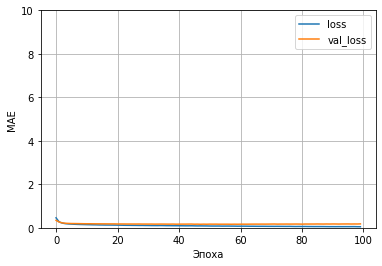

In [55]:
plot_loss(history)
dnn_model.evaluate(Xtest, Ytest, verbose=0)

# 5.Нейронная сеть, которая будет рекомендовать соотношение матрица-наполнитель 

### Нейронная сеть

In [56]:
Y = norm_df[['Соотношение матрица-наполнитель']]
X = norm_df.drop(['Соотношение матрица-наполнитель'], axis=1)

In [57]:
Xtrain, Xholdout, Ytrain, Yholdout = train_test_split(X, Y, test_size=0.3, random_state=17)
print(Xtrain.shape, Xholdout.shape)

(655, 12) (281, 12)


In [58]:
normalizer2 = tf.keras.layers.Normalization(axis=-1)
normalizer2.adapt(np.array(X))
print(normalizer2.mean.numpy())

[[0.5026951  0.4467639  0.5046643  0.49121633 0.5160587  0.37373248
  0.48864686 0.49570566 0.5211413  0.5117521  0.5022317  0.5137764 ]]


In [59]:
def build_and_compile_model(norm):
    model2 = keras.Sequential([
      norm,
      layers.Dense(300, activation='sigmoid'),
        layers.Dropout(0.6),
      layers.Dense(20, activation='sigmoid'),
      layers.Dense(10, activation='sigmoid'),
      layers.Dense(1)
    ])

    model2.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.RMSprop(0.001))
    return model2

dnn_model2 = build_and_compile_model(normalizer2)
dnn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 300)               3900      
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 20)                6020      
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                      

In [64]:
%%time
history2 = dnn_model2.fit(
    Xtrain,
    Ytrain,
    validation_split = 0.2,
    verbose=0, epochs=50)

KeyError: 0

0.9249774813652039

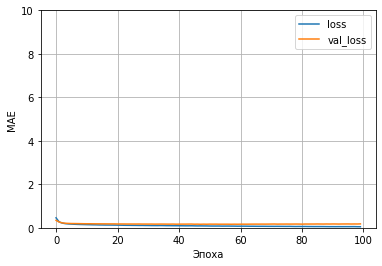

In [67]:
plot_loss(history)
dnn_model2.evaluate(Xtest, Ytest, verbose=0)